In [2]:
import pandas as pd
pd.options.display.max_colwidth = 100
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [3]:
def get_age_data(dataset):
    age_cats = ["HC03_VC08", "HC03_VC09", "HC03_VC10", "HC03_VC11", "HC03_VC12", "HC03_VC13", 
            "HC03_VC14", "HC03_VC15", "HC03_VC16", "HC03_VC17", "HC03_VC18", "HC03_VC19", "HC03_VC20"]
    
    age_labels = ["Under 5 Years", "5 to 9 Years", "10 to 14 Years", "15 to 19 Years", "20 to 24 Years",
             "25 to 34 Years", "35 to 44 Years", "45 to 54 Years", "55 to 59 Years", "60 to 64 Years",
             "65 to 74 Years", "75 to 84 Years", "85 Years and Over"]
    
    ages = {}
    dataset = dataset.transpose()
    for i in range(0,len(age_cats)):
        #ages.append(dataset[dataset.index == i][1])
        ages[age_labels[i]] = dataset[dataset.index == age_cats[i]][1][0]
        
    ages = pd.DataFrame(ages, index=[0])
    ages = ages[["Under 5 Years", "5 to 9 Years", "10 to 14 Years", "15 to 19 Years", "20 to 24 Years",
             "25 to 34 Years", "35 to 44 Years", "45 to 54 Years", "55 to 59 Years", "60 to 64 Years",
             "65 to 74 Years", "75 to 84 Years", "85 Years and Over"]]
    
    return ages

ages_C = get_age_data(pd.read_csv("ACS_16_5YR_DP05_with_ann.csv"))
ages_N = get_age_data(pd.read_csv("ACS_16_5YR_DP05_with_ann_N.csv"))
ages_CR = get_age_data(pd.read_csv("ACS_16_5YR_DP05_with_ann_CR.csv"))

[[]]

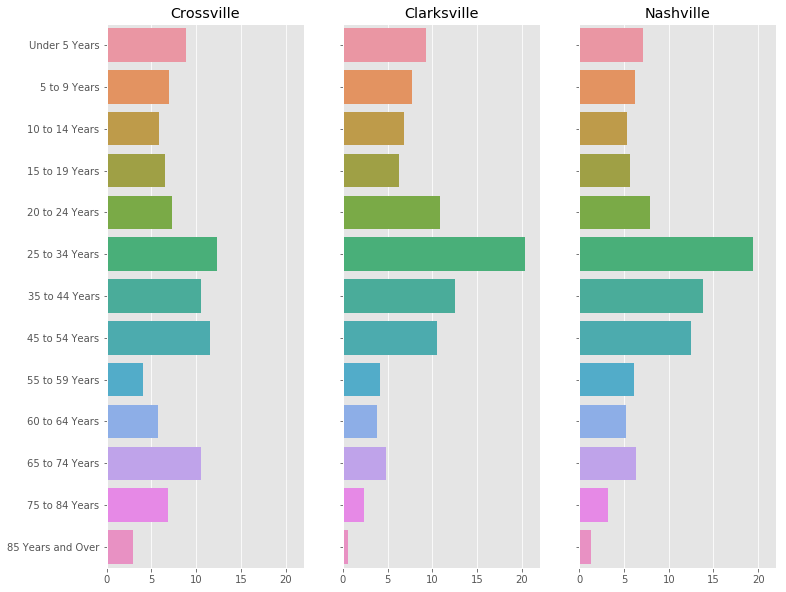

In [7]:
fig, ax = plt.subplots(1,3, figsize=(12,10))
sns.barplot(orient="h", data=ages_C, ax=ax[1]).set_title("Clarksville")
sns.barplot(orient="h", data=ages_N, ax=ax[2]).set_title("Nashville")
sns.barplot(orient="h", data=ages_CR, ax=ax[0]).set_title("Crossville")
ax[0].set_xlim(0, 22)
ax[1].set_xlim(0, 22)
ax[2].set_xlim(0, 22)
ax[1].set(yticklabels=[])
ax[2].set(yticklabels=[])

In [78]:
ages_table = ages_CR.transpose()
ages_table["Clarksville"] = ages_C.transpose()
ages_table["Nashville"] = ages_N.transpose()
ages_table.columns = ["Crossville", "Clarksville", "Nashville"]
print("Age Breakdown (Percentages) by City")
ages_table

Age Breakdown (Percentages) by City


,Crossville,Clarksville,Nashville
Under 5 Years,8.9,9.3,7.1
5 to 9 Years,7.0,7.7,6.2
10 to 14 Years,5.9,6.8,5.3
15 to 19 Years,6.5,6.3,5.7
20 to 24 Years,7.3,10.8,7.9
25 to 34 Years,12.3,20.3,19.4
35 to 44 Years,10.5,12.5,13.8
45 to 54 Years,11.5,10.5,12.5
55 to 59 Years,4.1,4.2,6.1
60 to 64 Years,5.7,3.8,5.2


In [8]:
def get_race(dataset):
    race_cats = ["HC03_VC88", "HC03_VC94", "HC03_VC95", "HC03_VC96", "HC03_VC97", "HC03_VC98", "HC03_VC100"]
    race_labels = ["Hispanic or Latino", "White", "Black", "American Indian", "Asian", "Pacific Islander", 
               "Multiracial"]
    
    races = {}
    dataset = dataset.transpose()
    
    for i in range(0,len(race_cats)):
        races[race_labels[i]] = dataset[dataset.index == race_cats[i]][1][0]
        
    races = pd.DataFrame(races, index=[0])
    races = races[["White", "Hispanic or Latino", "Black", "Asian", "Pacific Islander", "American Indian",  
               "Multiracial"]]
    
    return races

race_C = get_race(pd.read_csv("ACS_16_5YR_DP05_with_ann.csv"))
race_N = get_race(pd.read_csv("ACS_16_5YR_DP05_with_ann_N.csv"))
race_CR = get_race(pd.read_csv("ACS_16_5YR_DP05_with_ann_CR.csv"))

(0, 70)

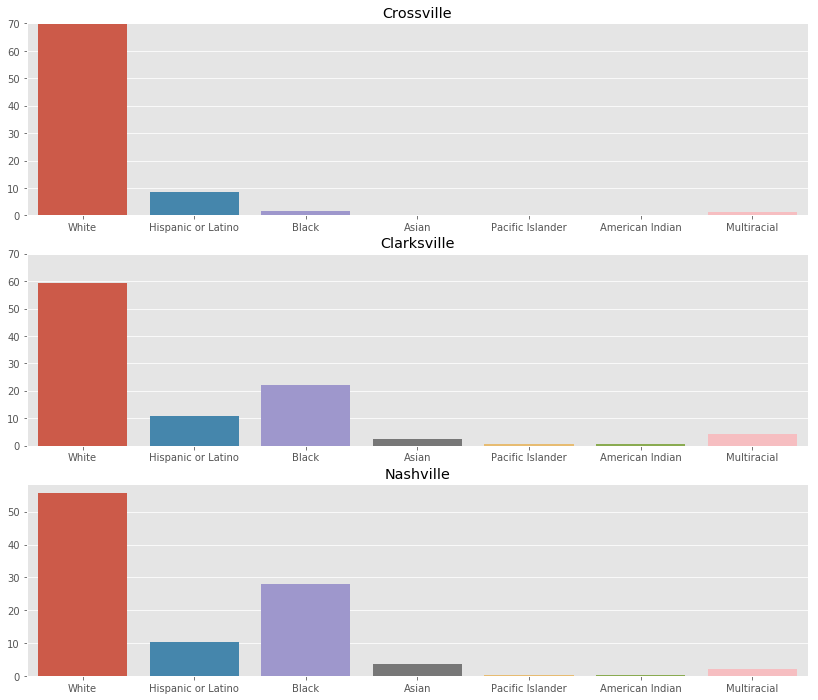

In [9]:
fig, ax = plt.subplots(3,1, figsize=(14,12))
sns.barplot(data=race_CR, ax=ax[0]).set_title("Crossville")
sns.barplot(data=race_C, ax=ax[1]).set_title("Clarksville")
sns.barplot(data=race_N, ax=ax[2]).set_title("Nashville")
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[0].set_ylim(0, 70)
ax[1].set_ylim(0, 70)
ax[1].set_ylim(0, 70)

In [49]:
race_table = race_CR.transpose()
race_table["Clarksville"] = race_C.transpose()
race_table["Nashville"] = race_N.transpose()
race_table.columns = ["Crossville", "Clarksville", "Nashville"]
print("Racial Demographic Percentages by City")
race_table

Racial Demographic Percentages by City


,Crossville,Clarksville,Nashville
White,88.1,59.4,55.7
Hispanic or Latino,8.6,10.8,10.3
Black,1.7,22.1,27.9
Asian,0.1,2.3,3.5
Pacific Islander,0.0,0.5,0.1
American Indian,0.3,0.6,0.2
Multiracial,1.3,4.1,2.1


In [74]:
def get_occupation(dataset):
    job_cats = ["HC03_VC50", "HC03_VC51", "HC03_VC52", "HC03_VC53", "HC03_VC54", "HC03_VC55", "HC03_VC56",
                "HC03_VC57", "HC03_VC58", "HC03_VC59", "HC03_VC60", "HC03_VC61", "HC03_VC62"]
    job_labels = ["Agriculture / Forestry / Fishing / etc", "Construction", "Manufacturing", "Wholesale Trade", 
                 "Retail Trade", "Transporation / Warehouse", "Information", "Finance, Insurance, Real Estate",
                 "Professional, Admin., Mgmt., and Sci.", "Education and Healthcare",
                "Arts, Entrtnmnt., and Food", "Other", "Public Administration"]
    
    jobs = {}
    dataset = dataset.transpose()
    
    for i in range(0,len(job_cats)):
        jobs[job_labels[i]] = dataset[dataset.index == job_cats[i]][1][0]
        
    jobs = pd.DataFrame(jobs, index=[0])
    jobs = jobs[["Agriculture / Forestry / Fishing / etc", "Construction", "Manufacturing", "Wholesale Trade", 
                 "Retail Trade", "Transporation / Warehouse", "Information", "Finance, Insurance, Real Estate",
                 "Professional, Admin., Mgmt., and Sci.", "Education and Healthcare",
                "Arts, Entrtnmnt., and Food", "Other", "Public Administration"]]
    
    return jobs

jobs_C = get_occupation(pd.read_csv("ACS_16_5YR_DP03_with_ann.csv"))
jobs_N = get_occupation(pd.read_csv("ACS_16_5YR_DP03_with_ann_N.csv"))
jobs_CR = get_occupation(pd.read_csv("ACS_16_5YR_DP03_with_ann_CR.csv"))

(0, 25)

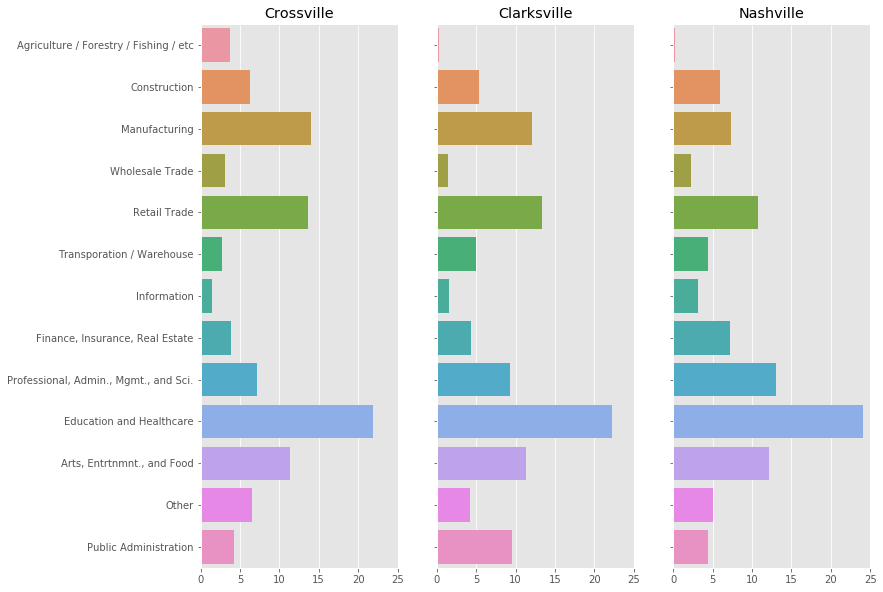

In [75]:
fig, ax = plt.subplots(1,3, figsize=(12,10))
sns.barplot(orient="h", data=jobs_CR, ax=ax[0]).set_title("Crossville")
sns.barplot(orient="h", data=jobs_C, ax=ax[1]).set_title("Clarksville")
sns.barplot(orient="h", data=jobs_N, ax=ax[2]).set_title("Nashville")
ax[1].set(yticklabels=[])
ax[2].set(yticklabels=[])
ax[0].set_xlim(0, 25)
ax[1].set_xlim(0, 25)
ax[2].set_xlim(0, 25)

In [76]:
jobs_table = jobs_CR.transpose()
jobs_table["Clarksville"] = jobs_C.transpose()
jobs_table["Nashville"] = jobs_N.transpose()
jobs_table.columns = ["Crossville", "Clarksville", "Nashville"]
print("Occupation Percentages by City")
jobs_table

Occupation Percentages by City


,Crossville,Clarksville,Nashville
Agriculture / Forestry / Fishing / etc,3.7,0.3,0.2
Construction,6.3,5.4,6.0
Manufacturing,14.0,12.1,7.3
Wholesale Trade,3.1,1.4,2.3
Retail Trade,13.7,13.4,10.8
Transporation / Warehouse,2.7,5.0,4.4
Information,1.4,1.5,3.1
"Finance, Insurance, Real Estate",3.8,4.3,7.2
"Professional, Admin., Mgmt., and Sci.",7.2,9.3,13.0
Education and Healthcare,21.9,22.2,24.1


In [62]:
def get_education(dataset):
    edu_cats_male = ["HC04_EST_VC43", "HC04_EST_VC47", "HC04_EST_VC51", "HC04_EST_VC55", "HC04_EST_VC59",
             "HC04_EST_VC67", "HC04_EST_VC71"]
    edu_cats_female = ["HC06_EST_VC43", "HC06_EST_VC47", "HC06_EST_VC51", "HC06_EST_VC55", "HC06_EST_VC59",
             "HC06_EST_VC67", "HC06_EST_VC71"] 
    edu_labels = ["White (non-Hispanic)", "Black", "American Indian", "Asian", "Pacific Islander", 
               "Multiracial", "Hispanic or Latino"]
    
    edu_male = {}
    edu_female = {}
    dataset = dataset.transpose()
    
    for i in range(0,len(edu_cats_male)):
        edu_male[edu_labels[i]] = dataset[dataset.index == edu_cats_male[i]][1][0]
        edu_female[edu_labels[i]] = dataset[dataset.index == edu_cats_female[i]][1][0]
        
    edu_male = pd.DataFrame(edu_male, index=[0])
    edu_male = edu_male[edu_labels]
    edu_female = pd.DataFrame(edu_female, index=[0])
    edu_female = edu_female[edu_labels]
    
    edu = edu_male.transpose()
    edu["female"] = edu_female.transpose()
    edu.columns = ["male", "female"]
    edu = pd.DataFrame(edu.unstack().reset_index())
    edu.columns = ["sex", "race", "percent"]
    edu["percent"] = edu["percent"].str.replace('-', '0',)
    edu["percent"] = pd.to_numeric(edu["percent"])
    
    
    return edu

edu_CR = get_education(pd.read_csv("ACS_16_5YR_S1501_with_ann_CR.csv"))
edu_C = get_education(pd.read_csv("ACS_16_5YR_S1501_with_ann.csv"))
edu_N = get_education(pd.read_csv("ACS_16_5YR_S1501_with_ann_N.csv"))

(0, 60)

<Figure size 1008x288 with 0 Axes>

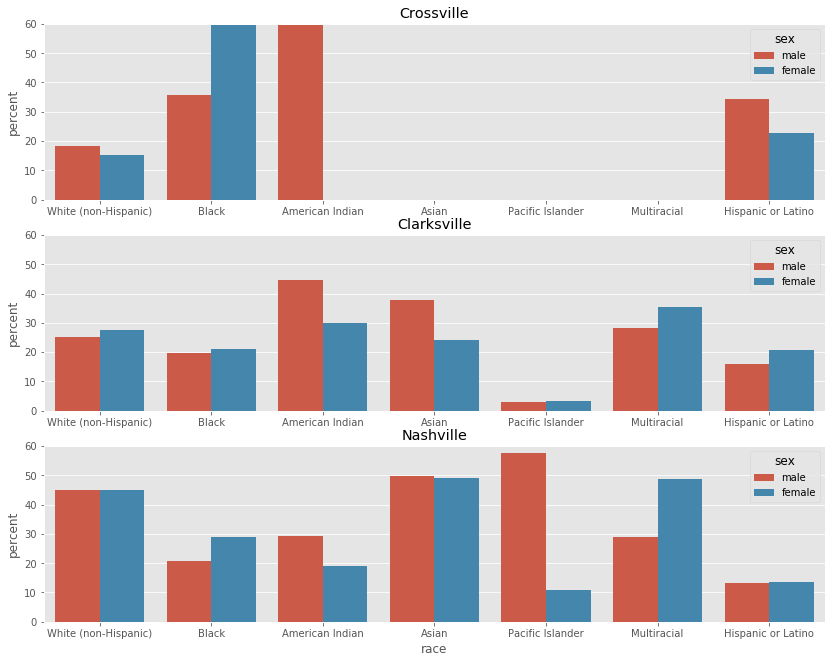

In [25]:
plt.figure(figsize=(14,4))
fig, ax = plt.subplots(3,1, figsize=(14,11))
sns.barplot(x="race", y="percent", hue="sex", data=edu_CR, ax=ax[0]).set_title("Crossville")
sns.barplot(x="race", y="percent", hue="sex", data=edu_C, ax=ax[1]).set_title("Clarksville")
sns.barplot(x="race", y="percent", hue="sex", data=edu_N, ax=ax[2]).set_title("Nashville")
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[0].set_ylim(0, 60)
ax[1].set_ylim(0, 60)
ax[2].set_ylim(0, 60)

In [53]:
def get_income(dataset):
    income_cats = ["HC03_VC75", "HC03_VC76", "HC03_VC77", "HC03_VC78", "HC03_VC79", "HC03_VC80", "HC03_VC81",
                "HC03_VC82", "HC03_VC83", "HC03_VC84"]
    income_labels = ["Less than 10K", "10K to 15K", "15K to 25K", "25K to 35K", "35K to 45K", "50K to 75K", 
                 "75K to 100K", "100K to 150K", "150K to 200K", "200K or More"]
    
    incomes = {}
    dataset = dataset.transpose()
    
    for i in range(0,len(income_cats)):
        incomes[income_labels[i]] = dataset[dataset.index == income_cats[i]][1][0]
        
    incomes = pd.DataFrame(incomes, index=[0])
    incomes = incomes[income_labels]
    
    return incomes


incomes_CR = get_income(pd.read_csv("ACS_16_5YR_DP03_with_ann_CR.csv"))
incomes_C = get_income(pd.read_csv("ACS_16_5YR_DP03_with_ann.csv"))
incomes_N = get_income(pd.read_csv("ACS_16_5YR_DP03_with_ann_N.csv"))

(0, 22)

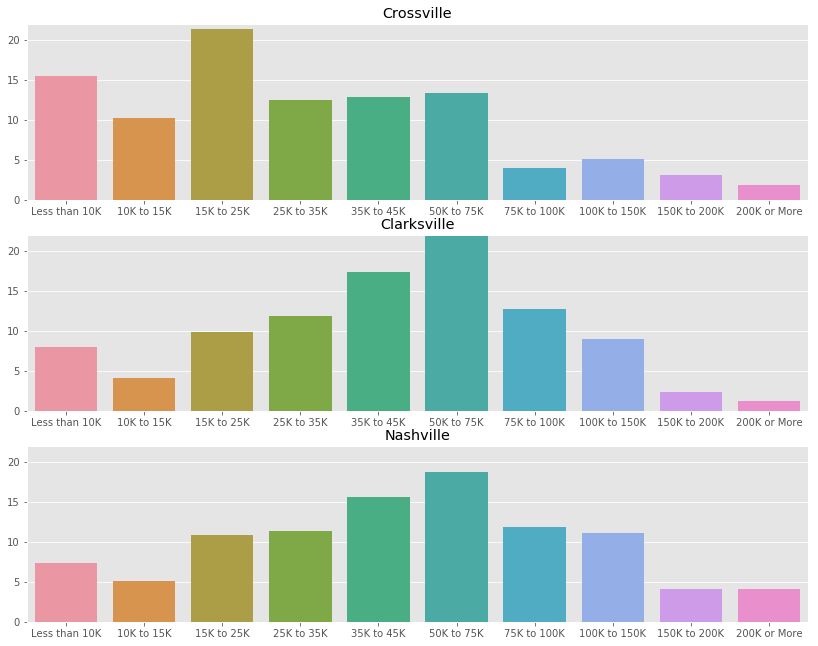

In [54]:
fig, ax = plt.subplots(3,1, figsize=(14,11))
sns.barplot(data=incomes_CR, ax=ax[0]).set_title("Crossville")
sns.barplot(data=incomes_C, ax=ax[1]).set_title("Clarksville")
sns.barplot(data=incomes_N, ax=ax[2]).set_title("Nashville")
ax[0].set_xlabel("")
ax[0].set_ylim(0, 22)
ax[1].set_ylim(0, 22)
ax[2].set_ylim(0, 22)

In [79]:
incomes_table = incomes_CR.transpose()
incomes_table["Clarksville"] = incomes_C.transpose()
incomes_table["Nashville"] = incomes_N.transpose()
incomes_table.columns = ["Crossville", "Clarksville", "Nashville"]
print("Income Breakdowns (Percentages) by City")
incomes_table

Income Breakdowns (Percentages) by City


,Crossville,Clarksville,Nashville
Less than 10K,15.5,8.0,7.3
10K to 15K,10.2,4.1,5.1
15K to 25K,21.3,9.9,10.8
25K to 35K,12.5,11.8,11.3
35K to 45K,12.8,17.3,15.6
50K to 75K,13.4,23.5,18.7
75K to 100K,4.0,12.7,11.9
100K to 150K,5.1,9.0,11.1
150K to 200K,3.1,2.3,4.1
200K or More,1.9,1.2,4.1


In [55]:
def get_poverty(dataset):
    poverty_cats = ["HC03_EST_VC27", "HC03_EST_VC19", "HC03_EST_VC20", "HC03_EST_VC21", "HC03_EST_VC22",
             "HC03_EST_VC24", "HC03_EST_VC26"]
    poverty_labels = ["White (non-Hispanic)", "Black", "American Indian", "Asian", "Pacific Islander", 
               "Multiracial", "Hispanic or Latino"]
    
    poverty = {}
    dataset = dataset.transpose()
    
    for i in range(0,len(poverty_cats)):
        poverty[poverty_labels[i]] = dataset[dataset.index == poverty_cats[i]][1][0]
        
    poverty = pd.DataFrame(poverty, index=[0])
    poverty = poverty[["White (non-Hispanic)", "Hispanic or Latino", "Black", "Asian", "Pacific Islander", 
               "American Indian", "Multiracial"]]
    
    return poverty

poverty_CR = get_poverty(pd.read_csv("ACS_16_5YR_S1701_with_ann_CR.csv"))
poverty_C = get_poverty(pd.read_csv("ACS_16_5YR_S1701_with_ann.csv"))
poverty_N = get_poverty(pd.read_csv("ACS_16_5YR_S1701_with_ann_N.csv"))

(0, 60)

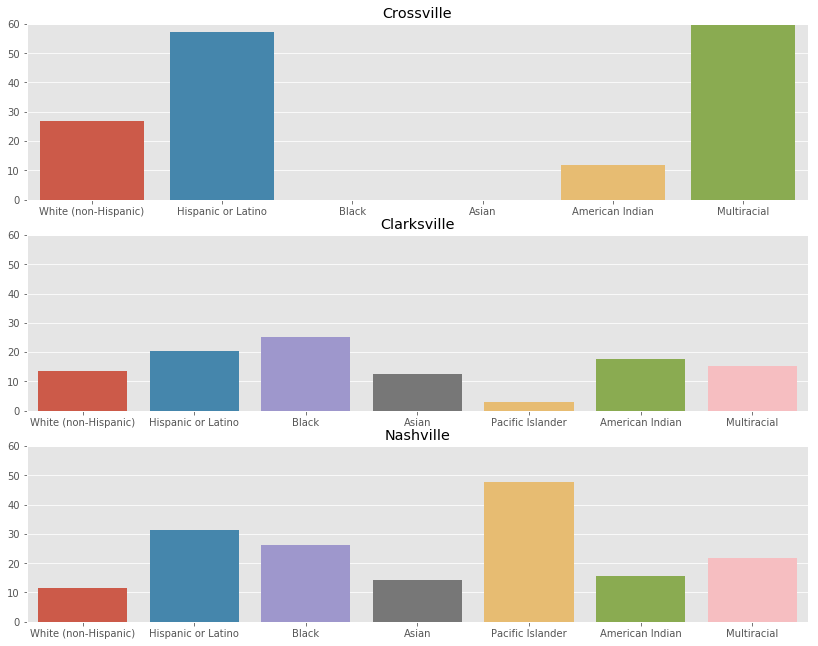

In [56]:
fig, ax = plt.subplots(3,1, figsize=(14,11))
sns.barplot(data=poverty_CR, ax=ax[0]).set_title("Crossville")
sns.barplot(data=poverty_C, ax=ax[1]).set_title("Clarksville")
sns.barplot(data=poverty_N, ax=ax[2]).set_title("Nashville")
ax[0].set_xlabel("")
ax[0].set_ylim(0, 60)
ax[1].set_ylim(0, 60)
ax[2].set_ylim(0, 60)

In [80]:
poverty_table = poverty_CR.transpose()
poverty_table["Clarksville"] = poverty_C.transpose()
poverty_table["Nashville"] = poverty_N.transpose()
poverty_table.columns = ["Crossville", "Clarksville", "Nashville"]
print("Poverty Breakdown by Race (Percentages) by City")
poverty_table

Poverty Breakdown by Race (Percentages) by City


,Crossville,Clarksville,Nashville
White (non-Hispanic),26.8,13.4,11.4
Hispanic or Latino,57.1,20.3,31.4
Black,0.0,25.1,26.3
Asian,0.0,12.4,14.4
Pacific Islander,-,2.9,47.6
American Indian,12.0,17.8,15.7
Multiracial,74.8,15.1,21.6
